In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

session = tf.get_default_session()
if session is None:
    session = tf.InteractiveSession()

In [32]:
from shoop import sho_integrate

from exoplanet.interp import interp1d

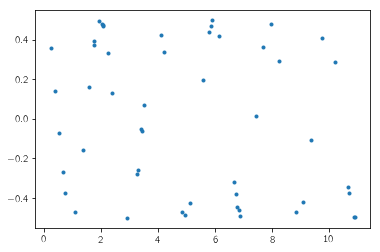

In [41]:
np.random.seed(42)

T = tf.float64

x0 = tf.Variable(0.5, dtype=T)
v0 = tf.Variable(-0.1, dtype=T)
k = tf.Variable(10.0, dtype=T)
session.run(tf.global_variables_initializer())

tmax = 11.234
tobs = tf.constant(np.sort(np.random.uniform(0, tmax, 50)), dtype=T)

step_size = 1e-2
N = int(tmax / step_size + 1)

t, x, v, a = sho_integrate(x0, v0, k, N, step_size)
xobs = interp1d(tobs, t, x)

xdata = xobs.eval()
xdata += 0.01 * np.random.randn(len(xdata))

loglike = -0.5 * tf.reduce_sum(tf.square((xobs - xdata) / 0.01))

plt.plot(tobs.eval(), xdata, ".")

var = [x0, v0, k]
grad = tf.gradients(loglike, var)

In [42]:
session.run(loglike)
%timeit session.run(loglike)

10000 loops, best of 3: 178 µs per loop


In [43]:
session.run(grad)
%timeit session.run(grad)

1000 loops, best of 3: 251 µs per loop


10000 loops, best of 3: 200 µs per loop


In [38]:
tf.test.compute_gradient_error(var, [(), (), ()], x, (N,), var_val, delta=1e-8)

1.1288147999666265e-07

In [39]:
tf.test.compute_gradient_error(var, [(), (), ()], v, (N,), var_val, delta=1e-8)

3.3826954759508254e-07

In [40]:
tf.test.compute_gradient_error(var, [(), (), ()], a, (N,), var_val, delta=1e-8)

1.1444263274817956e-06